In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/adult.csv")  
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [6]:
stats_df = pd.DataFrame({
    "Variance": df[num_cols].var(),
    "Std Dev": df[num_cols].std(),
    "Range": df[num_cols].max() - df[num_cols].min(),
    "IQR": df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)
})
stats_df


,Variance,Std Dev,Range,IQR
age,1.860614e+02,13.640433,73,20.0
fnlwgt,1.114080e+10,105549.977697,1472420,119224.0
education.num,6.618890e+00,2.572720,15,3.0
capital.gain,5.454254e+07,7385.292085,99999,0.0
capital.loss,1.623769e+05,402.960219,4356,0.0
hours.per.week,1.524590e+02,12.347429,98,5.0


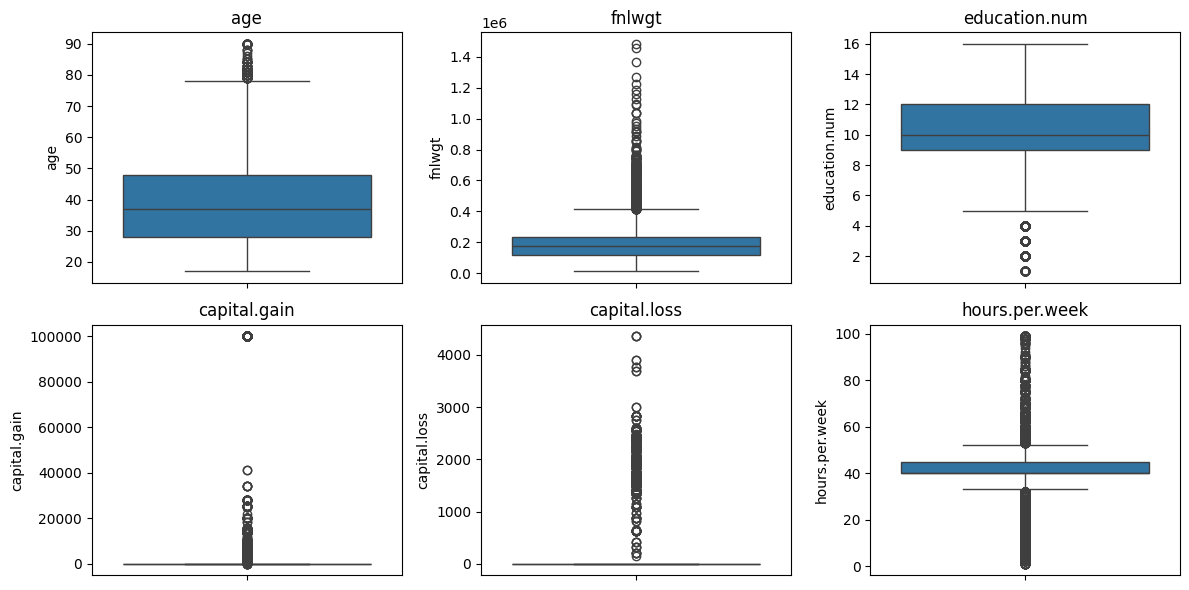

In [7]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import pandas as pd

# Group 1: around 100 ±3
group1 = np.random.randint(97, 104, size=8000)
# Group 2: around 500 ±3
group2 = np.random.randint(497, 604, size=1000)

data = np.concatenate([group1, group2])
df = pd.DataFrame({"value": data})

Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['value'] < lower) | (df['value'] > upper)]
print(outliers.shape)


(1000, 1)
